<a href="https://colab.research.google.com/github/Idguerrero333/Challenge-Alura-Telecom-X/blob/main/Challenge_TelecomX_Latam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Limpieza y Tratamiento de Datos

In [19]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Cargar datos desde la API
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
response = requests.get(url)
data = response.json()

# Normalizar el JSON anidado
df = pd.json_normalize(data)

# Mostrar las primeras filas
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#Explorar Columnas y Tipos de Datos
Verificamos la estructura del dataset. Las columnas incluyen:
* customerID,
* gender,
* SeniorCitizen,
* Partner,
* Dependents,
* tenure,
* PhoneService,
* MultipleLines,
* InternetService,
* OnlineSecurity,
* OnlineBackup,
* DeviceProtection,
* TechSupport,
* StreamingTV,
* StreamingMovies,
* Contract,
* PaperlessBilling,
* PaymentMethod,
* MonthlyCharges,
* TotalCharges,
* Churn.

(Diccionario de datos asumido basado en estructura estándar: gender - Género, SeniorCitizen - Ciudadano mayor (0/1), Partner - Pareja (Yes/No), Dependents - Dependientes (Yes/No), tenure - Antigüedad en meses, PhoneService - Servicio telefónico (Yes/No), MultipleLines - Líneas múltiples (Yes/No/No phone service), InternetService - Tipo de internet (DSL/Fiber optic/No), OnlineSecurity/Backup/Protection/TechSupport/StreamingTV/Movies - Servicios adicionales (Yes/No/No internet service), Contract - Tipo de contrato (Month-to-month/One year/Two year), PaperlessBilling - Facturación sin papel (Yes/No), PaymentMethod - Método de pago (Electronic check/Mailed check/Bank transfer/Credit card), MonthlyCharges - Cargos mensuales, TotalCharges - Cargos totales, Churn - Evasión (Yes/No).)

In [20]:
# Información del DataFrame
df.info()

# Tipos de datos
print(df.dtypes)

# Columnas relevantes para churn: todas, pero enfocadas en demográficas, servicios, contrato, pagos y cargos.
relevant_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
                    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                    'MonthlyCharges', 'TotalCharges', 'Churn']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [21]:
# Prefijos a eliminar
prefijos = ['customer.', 'phone.', 'internet.', 'account.', 'Charges.']

# Listas para el mapeo (emparejamiento)
nombres_actuales = []
nombres_limpios = []

# Iterar sobre las columnas del DataFrame
for col in df.columns:
    es_prefijo = False

    # Verificar si la columna comienza con alguno de los prefijos
    for prefijo in prefijos:
        if col.startswith(prefijo):
            nombres_actuales.append(col)
            # Eliminar el prefijo para obtener el nombre limpio
            nombres_limpios.append(col.replace(prefijo, '', 1))
            es_prefijo = True
            break

    # Si la columna no tiene prefijo (ej: customerID, Churn), se mantiene igual
    if not es_prefijo:
        nombres_actuales.append(col)
        nombres_limpios.append(col)


# Usar zip() para crear el diccionario de mapeo
# Empareja (zip) los nombres actuales con los nombres limpios
mapeo_renombre = dict(zip(nombres_actuales, nombres_limpios))

# Renombrado con .rename()
# Le pasamos el diccionario de mapeo generado por zip
df = df.rename(columns=mapeo_renombre)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Comprobación de Incoherencias
Verificamos valores ausentes, duplicados, formatos incorrectos e inconsistencias en categorías.
Python

In [22]:
# Valores ausentes
print(df.isnull().sum())

# Duplicados
print(df.duplicated().sum())

# Valores únicos en categóricas
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']:
    print(f'{col}: {df[col].unique()}')

# TotalCharges es string, convertir a float (manejar espacios vacíos)
df['Charges.Total'] = pd.to_numeric(df['Charges.Total'].str.strip(), errors='coerce')

# Normalizar fechas si aplica (no hay en este dataset)

customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
0
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to

#Manejo de Inconsistencias
Limpiamos: convertimos TotalCharges a numérico, manejamos valores vacíos en Churn (asumir No o drop), estandarizamos strings.

In [23]:
# Manejar vacíos en Churn (asumir 'No' o drop; aquí drop para simplicidad)
df = df[df['Churn'] != '']

# Manejar 'No phone service' / 'No internet service' como 'No'
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})

# Manipulación de strings: lower case para consistencia
for col in df.select_dtypes(include='object').columns:
    if col != 'customerID':
        df[col] = df[col].str.lower().str.strip().str.replace(' ', '_')  # Ejemplo: replace spaces

# Drop duplicados si hay
df.drop_duplicates(inplace=True)

#Columna de Cuentas Diarias
Calculamos cargos diarios como MonthlyCharges / 30 (aproximado).

In [24]:
df['Daily'] = df['Charges.Monthly'] / 30

#Estandarización y Transformación de Datos
Convertimos Yes/No a 1/0, renombramos columnas para claridad.

In [25]:
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn'] + service_cols
for col in binary_cols:
    df[col] = df[col].map({'yes': 1, 'no': 0, '': np.nan})  # Map to binary

# Renombrar columnas (opcional, para español)
df.rename(columns={
    'gender': 'Genero', 'SeniorCitizen': 'CiudadanoMayor', 'Partner': 'Pareja', 'Dependents': 'Dependientes',
    'tenure': 'Antiguedad', 'PhoneService': 'ServicioTelefonico', 'MultipleLines': 'LineasMultiples',
    'InternetService': 'ServicioInternet', 'OnlineSecurity': 'SeguridadOnline', 'OnlineBackup': 'BackupOnline',
    'DeviceProtection': 'ProteccionDispositivo', 'TechSupport': 'SoporteTecnico', 'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas', 'Contract': 'Contrato', 'PaperlessBilling': 'FacturacionSinPapel',
    'PaymentMethod': 'MetodoPago', 'Charges.Monthly': 'CargosMensuales', 'Charges.Total': 'CargosTotales',
    'Churn': 'Evasion', 'Daily': 'CargosDiarios'
}, inplace=True)

##Análisis Exploratorio de Datos
Análisis Descriptivo
Calculamos métricas estadísticas.
Python

In [26]:
df.describe()

,Evasion,CiudadanoMayor,Pareja,Dependientes,Antiguedad,ServicioTelefonico,LineasMultiples,SeguridadOnline,BackupOnline,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,FacturacionSinPapel,CargosMensuales,CargosTotales,CargosDiarios
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2283.300441,2.158723
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.771362,1.003002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.608333
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,401.450000,1.183333
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1397.475000,2.345000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3794.737500,2.995000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.958333


#Distribución de Evasión
Visualizamos la proporción de churn.

Evasion
0.0    73.463013
1.0    26.536987
Name: proportion, dtype: float64


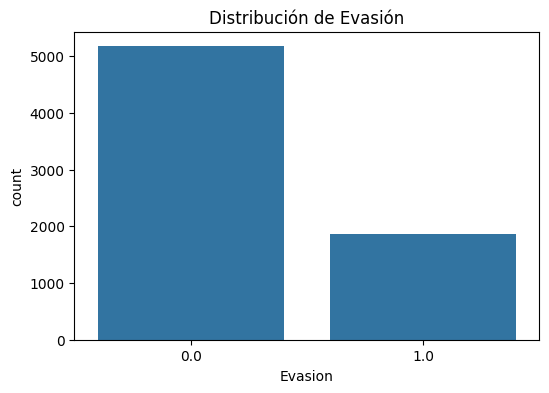

In [27]:
churn_dist = df['Evasion'].value_counts(normalize=True) * 100
print(churn_dist)

# Gráfico
plt.figure(figsize=(6,4))
sns.countplot(x='Evasion', data=df)
plt.title('Distribución de Evasión')
plt.show()

#Recuento de Evasión por Variables Categóricas
Exploramos churn por género, contrato, método de pago, etc.

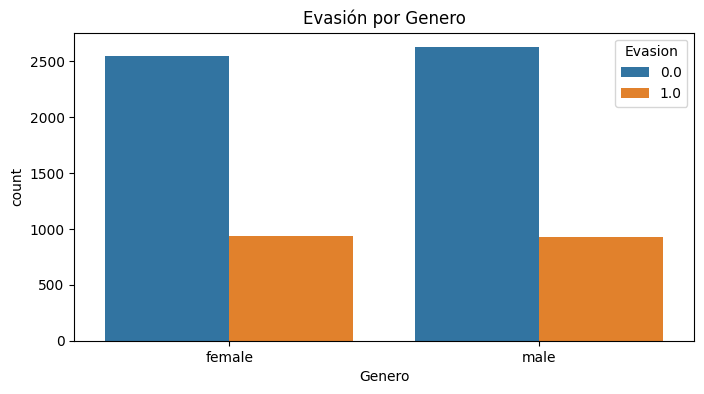

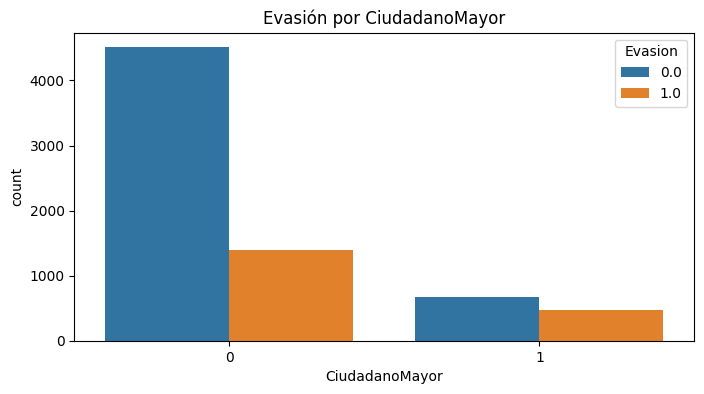

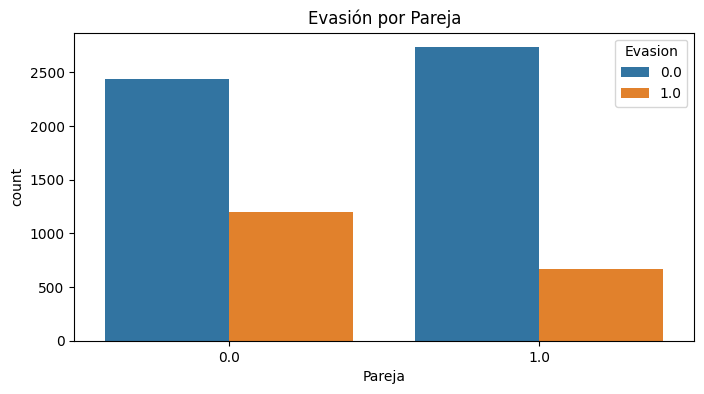

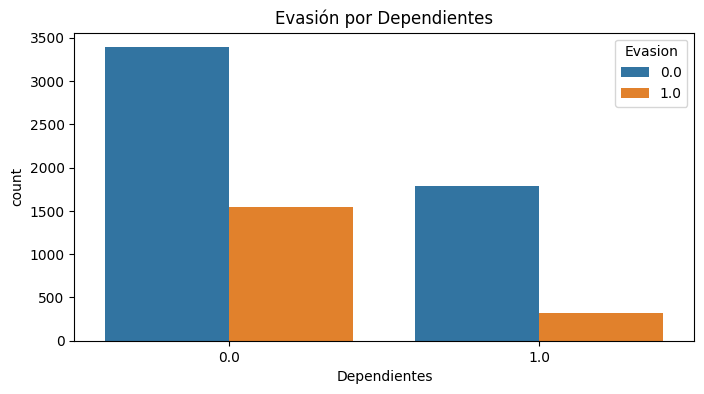

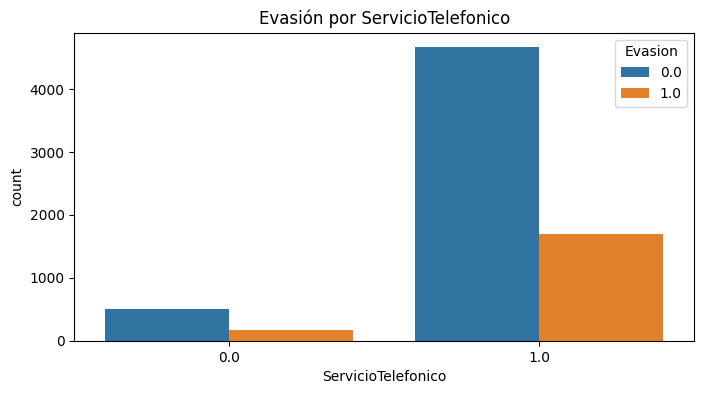

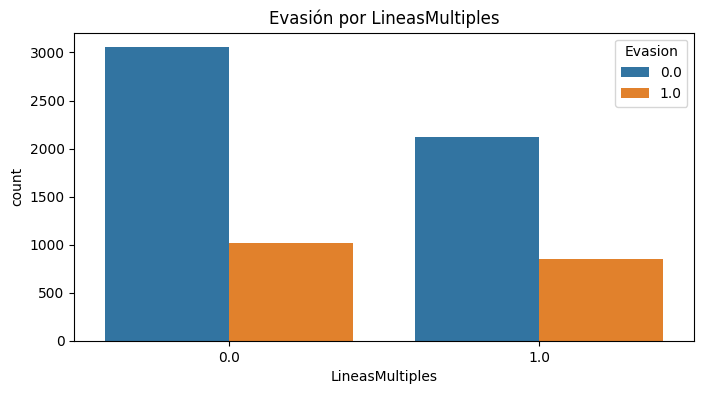

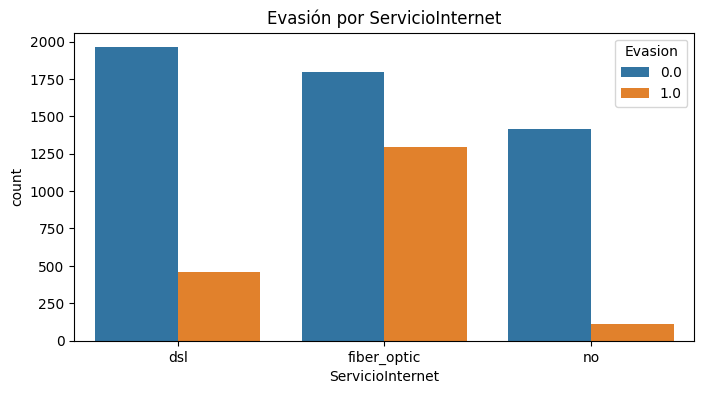

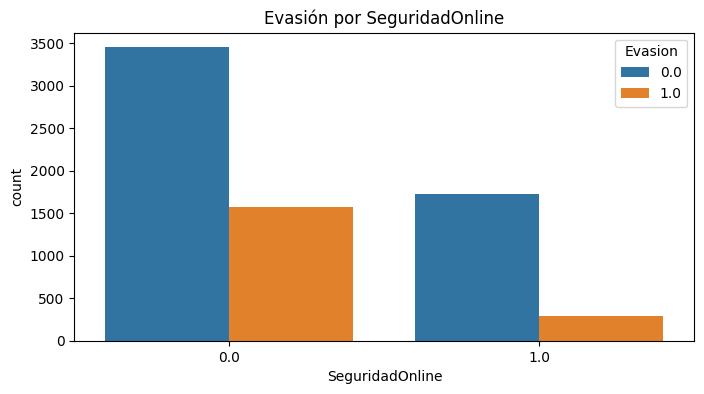

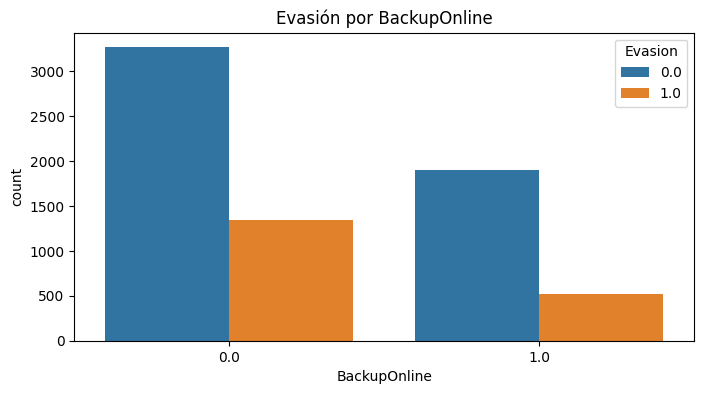

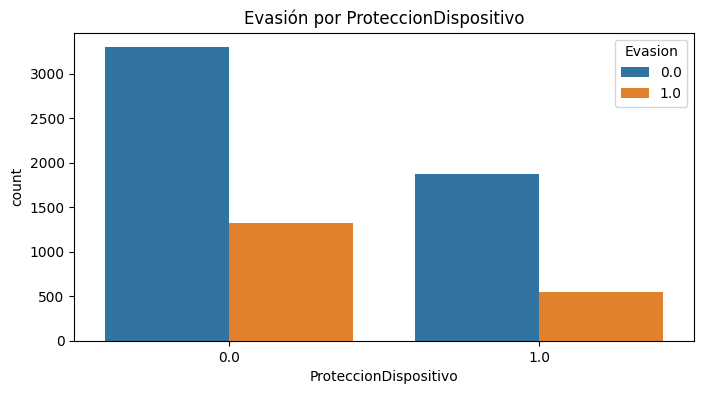

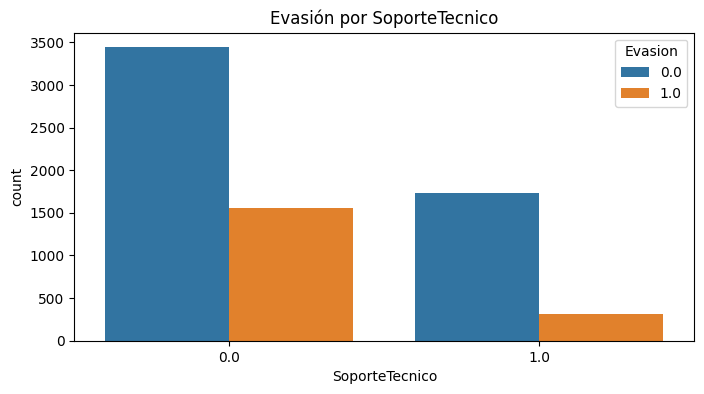

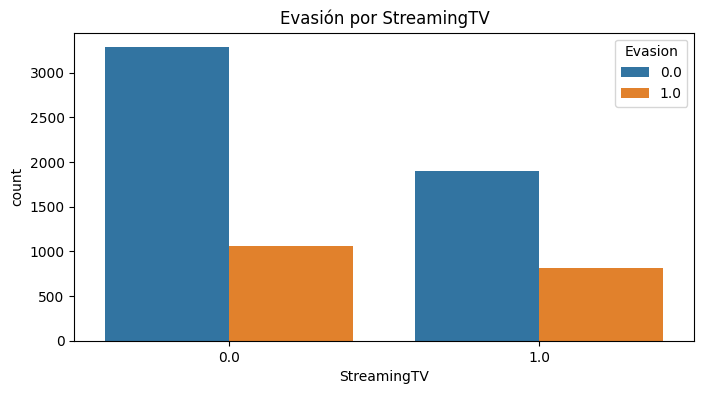

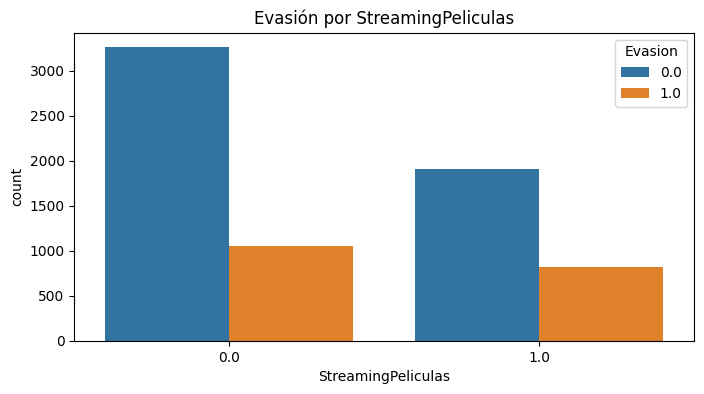

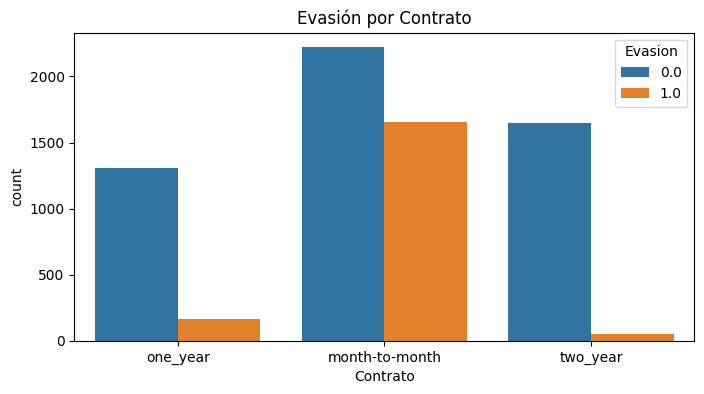

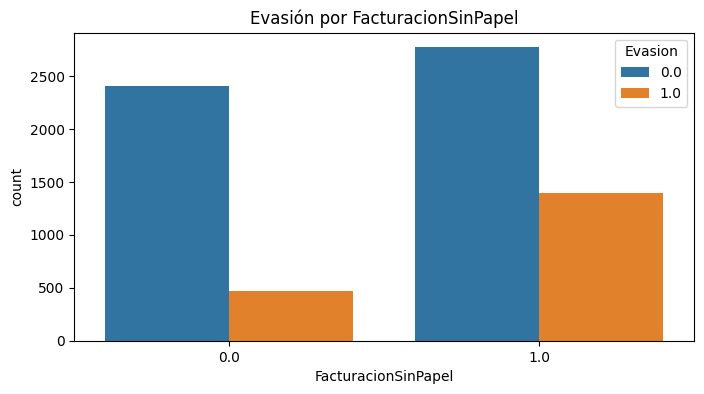

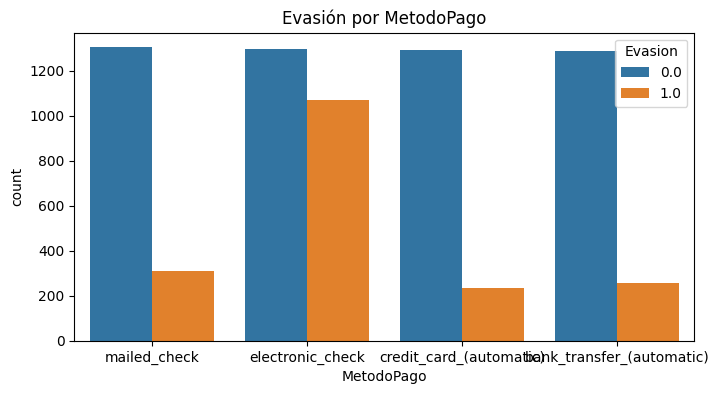

In [28]:
cat_vars = ['Genero', 'CiudadanoMayor', 'Pareja', 'Dependientes', 'ServicioTelefonico', 'LineasMultiples',
            'ServicioInternet', 'SeguridadOnline', 'BackupOnline', 'ProteccionDispositivo', 'SoporteTecnico',
            'StreamingTV', 'StreamingPeliculas', 'Contrato', 'FacturacionSinPapel', 'MetodoPago']

for var in cat_vars:
    plt.figure(figsize=(8,4))
    sns.countplot(x=var, hue='Evasion', data=df)
    plt.title(f'Evasión por {var}')
    plt.show()

#Conteo de Evasión por Variables Numéricas
Distribución de tenure, MonthlyCharges, TotalCharges por churn.

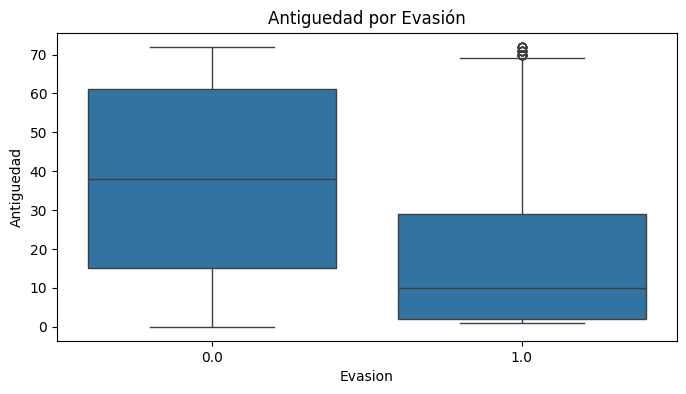

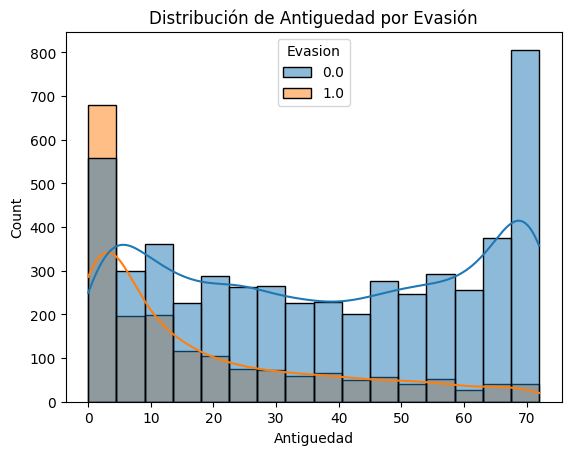

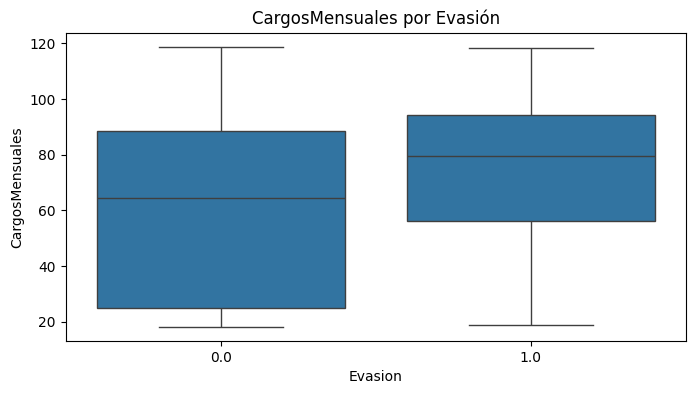

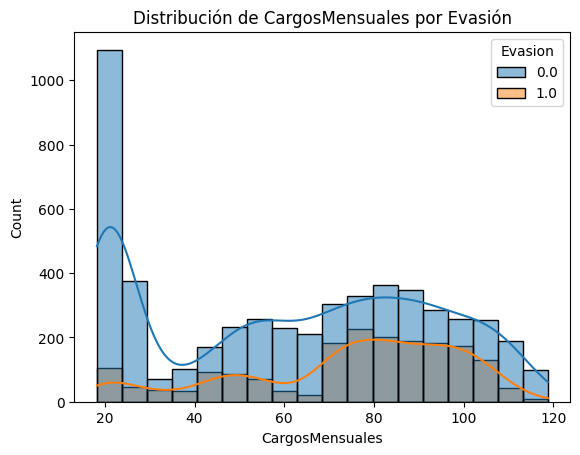

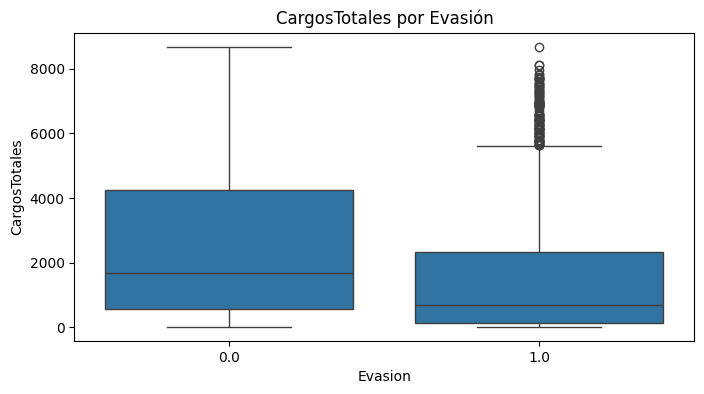

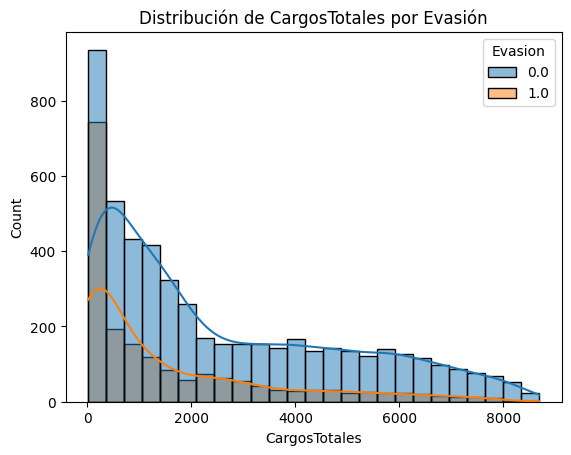

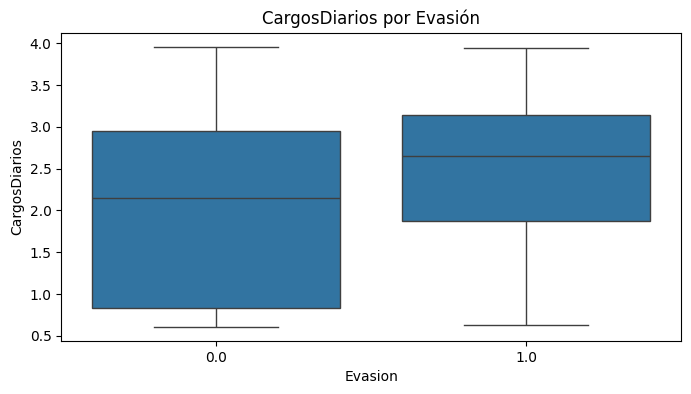

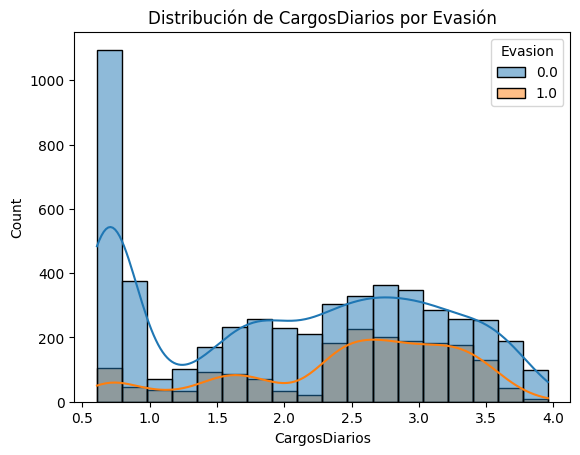

In [29]:
num_vars = ['Antiguedad', 'CargosMensuales', 'CargosTotales', 'CargosDiarios']

for var in num_vars:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Evasion', y=var, data=df)
    plt.title(f'{var} por Evasión')
    plt.show()

    # Histograma
    sns.histplot(data=df, x=var, hue='Evasion', kde=True)
    plt.title(f'Distribución de {var} por Evasión')
    plt.show()

#Análisis de Correlación (Extra)
Correlaciones entre variables.

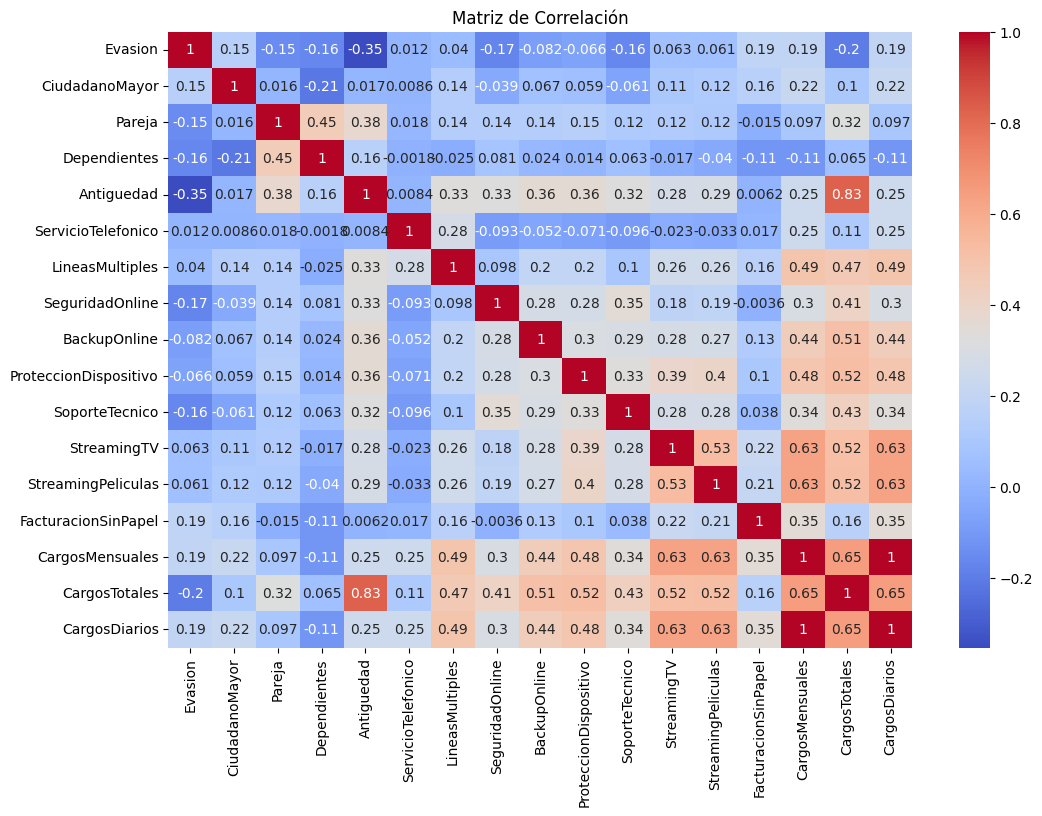

Evasion                  1.000000
CargosMensuales          0.193356
CargosDiarios            0.193356
FacturacionSinPapel      0.191825
CiudadanoMayor           0.150889
StreamingTV              0.063228
StreamingPeliculas       0.061382
LineasMultiples          0.040102
ServicioTelefonico       0.011942
ProteccionDispositivo   -0.066160
BackupOnline            -0.082255
Pareja                  -0.150448
Dependientes            -0.164221
SoporteTecnico          -0.164674
SeguridadOnline         -0.171226
CargosTotales           -0.199484
Antiguedad              -0.352229
Name: Evasion, dtype: float64


In [30]:
# Seleccionar numéricas y binarias
corr_df = df.select_dtypes(include=['float64', 'int64'])

# Matriz de correlación
corr_matrix = corr_df.corr()

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Correlación con Evasión
print(corr_matrix['Evasion'].sort_values(ascending=False))

#Conclusiones e Insights

* La tasa de churn es aproximadamente 26%
* Clientes con contratos mensuales tienen mayor churn que anuales.
* Métodos de pago electrónicos están asociados con mayor churn.
* Mayor antigüedad y cargos totales reducen churn.
* Servicios adicionales como soporte técnico reducen churn.
* Ciudadanos mayores y sin dependientes churn más.


#Recomendaciones

* Ofrecer descuentos para contratos a largo plazo.
* Mejorar soporte para clientes con pagos electrónicos.
* Programas de retención para seniors y clientes nuevos (baja antigüedad).
* Bundles con servicios adicionales para reducir churn.
* Monitorear cargos diarios/mensuales para identificar riesgos.